## Replicable Plots

In [237]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file = 'ACSMobility_2_through_3.pkl'
df = pd.read_pickle(file)
scenario = file.split('_')[0]
separate_plots = False

if separate_plots:

    FIGSIZE_ONE_COLUMN = (6, 4)
    FIGSIZE_TWO_COLUMN = (14, 4)
    FIGSIZE_TWO_COLUMN_LARGE = (14, 6)
    DPI = 120
    TITLE_FONTSIZE = 14
    LABEL_FONTSIZE = 12
    TICKS_FONTSIZE = 10
    SUPER_TITLE_FONTSIZE = 16
    LINE_WIDTH = 3
    MARKER_1 = 'o'
    PLOT_STYLE = "whitegrid"

    sns.set(style=PLOT_STYLE)

    def epsilons_as_lambda_changes(df, scenario):
        metrics = ['$\\epsilon_{TPR}$', '$\\epsilon_{FPR}$', '$\\epsilon_{PPV}$', '$\\epsilon_{NPV}$', '$\\epsilon_{DP}$']

        fair_overall_df = df[(df['method'] == 'fair') & (df['dataset_subset'] == 'overall')]
        best_epsilons = fair_overall_df['best_epsilons'][fair_overall_df['best_epsilons'].notnull()]
        for metric in metrics:
            fair_overall_df[metric] = best_epsilons.apply(lambda x: x[1][2][metrics.index(metric)])
        
        plt.figure(figsize=FIGSIZE_TWO_COLUMN_LARGE, dpi=DPI)

        for i, metric in enumerate(metrics, 1):
            plt.subplot(2, 3, i)
            sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df[metric], color='blue', marker=MARKER_1, linewidth=LINE_WIDTH)
            plt.title(f'{metric} vs $\\lambda$ ({scenario} Scenario)', fontsize=TITLE_FONTSIZE)
            plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
            plt.ylabel(metric, fontsize=LABEL_FONTSIZE)
            plt.xticks(fontsize=TICKS_FONTSIZE)
            plt.yticks(fontsize=TICKS_FONTSIZE)

        plt.tight_layout()
        plt.show()

    def thresholds_as_lambda_changes(df, scenario):
        fair_overall_df = df[(df['method'] == 'fair') & (df['dataset_subset'] == 'overall')]

        fair_overall_df['thresholds_group_1'] = fair_overall_df['best_thresholds'].apply(lambda x: x.get(1) if x else None)
        fair_overall_df['thresholds_group_2'] = fair_overall_df['best_thresholds'].apply(lambda x: x.get(2) if x else None)

        plt.figure(figsize=FIGSIZE_ONE_COLUMN, dpi=DPI)
        
        sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df['thresholds_group_1'], marker=MARKER_1, linewidth=LINE_WIDTH, label='White')
        sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df['thresholds_group_2'], marker=MARKER_1, linewidth=LINE_WIDTH, label='Black')
        
        plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
        plt.ylabel('$\\tau$', fontsize=LABEL_FONTSIZE)
        plt.title(f'$\\tau$ as $\\lambda$ Changes ({scenario} Scenario)', fontsize=TITLE_FONTSIZE)
        plt.xticks(fontsize=TICKS_FONTSIZE)
        plt.yticks(fontsize=TICKS_FONTSIZE)
        plt.legend(fontsize=LABEL_FONTSIZE)
        plt.grid(True)
        
        plt.show()

    def combined_metrics_and_thresholds_plot(df, scenario):
        metrics = ['$\\epsilon_{TPR}$', '$\\epsilon_{FPR}$', '$\\epsilon_{PPV}$', '$\\epsilon_{NPV}$', '$\\epsilon_{DP}$']

        fair_overall_df = df[(df['method'] == 'fair') & (df['dataset_subset'] == 'overall')]
        best_epsilons = fair_overall_df['best_epsilons'][fair_overall_df['best_epsilons'].notnull()]
        for metric in metrics:
            fair_overall_df[metric] = best_epsilons.apply(lambda x: x[1][2][metrics.index(metric)])
        
        plt.figure(figsize=FIGSIZE_TWO_COLUMN_LARGE, dpi=DPI)

        for i, metric in enumerate(metrics, 1):
            plt.subplot(2, 3, i)
            sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df[metric], color='blue', marker=MARKER_1, linewidth=LINE_WIDTH)
            plt.title(f'{metric} vs $\\lambda$ ({scenario} Scenario)', fontsize=TITLE_FONTSIZE)
            plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
            plt.ylabel(metric, fontsize=LABEL_FONTSIZE)
            plt.xticks(fontsize=TICKS_FONTSIZE)
            plt.yticks(fontsize=TICKS_FONTSIZE)

        fair_overall_df['thresholds_group_1'] = fair_overall_df['best_thresholds'].apply(lambda x: x.get(1) if x else None)
        fair_overall_df['thresholds_group_2'] = fair_overall_df['best_thresholds'].apply(lambda x: x.get(2) if x else None)

        plt.subplot(2, 3, 6)
        sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df['thresholds_group_1'], marker=MARKER_1, linewidth=LINE_WIDTH, label='White')
        sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df['thresholds_group_2'], marker=MARKER_1, linewidth=LINE_WIDTH, label='Black')
        plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
        plt.ylabel('$\\tau$', fontsize=LABEL_FONTSIZE)
        plt.title(f'$\\tau$ as $\\lambda$ Changes ({scenario} Scenario)', fontsize=TITLE_FONTSIZE)
        plt.xticks(fontsize=TICKS_FONTSIZE)
        plt.yticks(fontsize=TICKS_FONTSIZE)
        plt.legend(fontsize=LABEL_FONTSIZE)
        plt.grid(True)

        plt.tight_layout()
        plt.show()


    def best_objective_value_as_lambda_changes(df, scenario):
        fair_overall_df = df[(df['dataset_subset'] == 'overall') & (df['method'] == 'fair')]
        fair_overall_df = fair_overall_df.sort_values('lambda')
        sns.set(style=PLOT_STYLE)

        plt.figure(figsize=FIGSIZE_TWO_COLUMN, dpi=DPI)

        plt.subplot(1, 3, 1)
        sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df['best_objective_value'], marker=MARKER_1, color="blue", linewidth=LINE_WIDTH)
        plt.title('Objective Value vs $\\lambda$', fontsize=TITLE_FONTSIZE)
        plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
        plt.ylabel('Objective', fontsize=LABEL_FONTSIZE)
        plt.xticks(fontsize=TICKS_FONTSIZE)
        plt.yticks(fontsize=TICKS_FONTSIZE)

        plt.subplot(1, 3, 2)
        sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df['accuracy'], marker=MARKER_1, color='orange', linewidth=LINE_WIDTH)
        plt.title('Accuracy vs $\\lambda$', fontsize=TITLE_FONTSIZE)
        plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
        plt.ylabel('ACC (Overall)', fontsize=LABEL_FONTSIZE)
        plt.xticks(fontsize=TICKS_FONTSIZE)
        plt.yticks(fontsize=TICKS_FONTSIZE)

        plt.subplot(1, 3, 3)
        sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df['f1'], marker=MARKER_1, color='green', linewidth=LINE_WIDTH)
        plt.title('F1 vs $\\lambda$', fontsize=TITLE_FONTSIZE)
        plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
        plt.ylabel('F1 (Overall)', fontsize=LABEL_FONTSIZE)
        plt.xticks(fontsize=TICKS_FONTSIZE)
        plt.yticks(fontsize=TICKS_FONTSIZE)

        # plt.suptitle(f'Changing the Lambda Parameter in ApproxThresh Objective Function for {scenario} Scenario', fontsize=SUPER_TITLE_FONTSIZE)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])

        plt.show()

    epsilons_as_lambda_changes(df, scenario)
    thresholds_as_lambda_changes(df, scenario)
    best_objective_value_as_lambda_changes(df, scenario)
    combined_metrics_and_thresholds_plot(df, scenario)

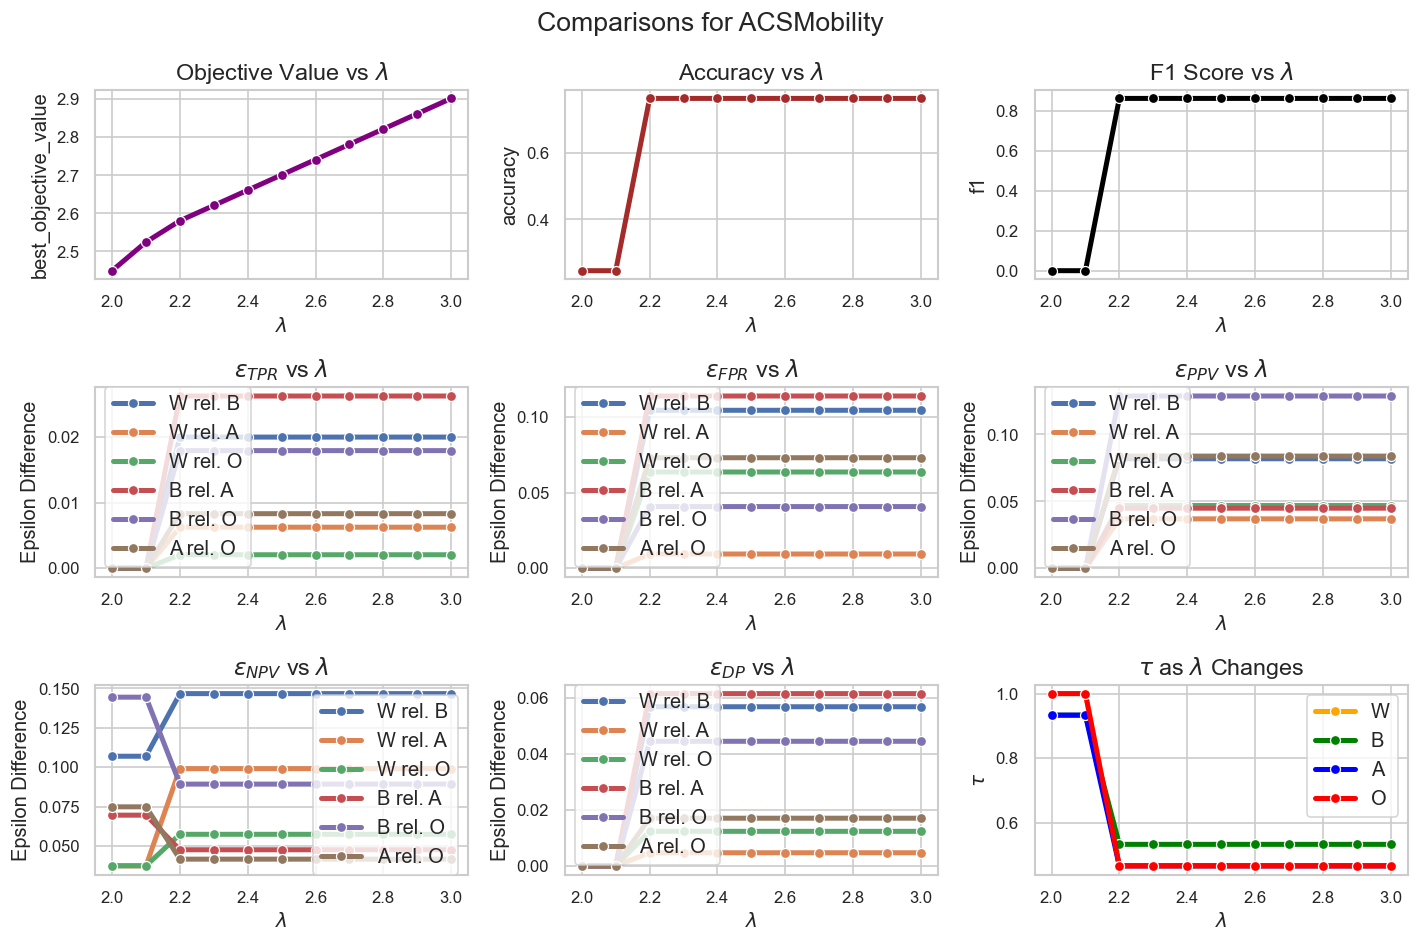

In [238]:
FIGSIZE_THREE_COLUMN = (12, 8)
DPI = 120
TITLE_FONTSIZE = 14
LABEL_FONTSIZE = 12
TICKS_FONTSIZE = 10
LINE_WIDTH = 3
MARKER_1 = 'o'
PLOT_STYLE = "whitegrid"

race_agg_names = {'1': 'W',
                 '2': 'B',
                 '3': 'A',
                 '4': 'O'}

def combined_metrics_plot(df, scenario):
    metrics_overall = ['best_objective_value', 'accuracy', 'f1']
    colors_overall = ['purple', 'brown', 'black']
    titles_overall = ['Objective Value', 'Accuracy', 'F1 Score']

    metrics_epsilon = ['$\\epsilon_{TPR}$', '$\\epsilon_{FPR}$', '$\\epsilon_{PPV}$', '$\\epsilon_{NPV}$', '$\\epsilon_{DP}$']

    fair_overall_df = df[(df['method'] == 'fair') & (df['dataset_subset'] == 'overall')]
    fair_overall_df = fair_overall_df.sort_values('lambda')
    best_epsilons = fair_overall_df['best_epsilons'][fair_overall_df['best_epsilons'].notnull()]

    unique_groups = df['dataset_subset'].unique().tolist()
    unique_groups.remove('overall')

    pair_combinations = [(unique_groups[i], unique_groups[j]) for i in range(len(unique_groups)) for j in range(i+1, len(unique_groups))]
    
    for pair in pair_combinations:
        pair_key = str(pair[0]) + '_' + str(pair[1])
        for metric in metrics_epsilon:
            column = metric + '_' + pair_key
            fair_overall_df[column] = best_epsilons.apply(lambda x: x[int(pair[0])][int(pair[1])][metrics_epsilon.index(metric)])
    
    for group in unique_groups:
        fair_overall_df['thresholds_group_' + str(group)] = fair_overall_df['best_thresholds'].apply(lambda x: x.get(int(group)) if x else None)

    plt.figure(figsize=FIGSIZE_THREE_COLUMN, dpi=DPI)
    
    for i in range(3):
        plt.subplot(3, 3, i+1)
        sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df[metrics_overall[i]], marker=MARKER_1, color=colors_overall[i], linewidth=LINE_WIDTH)
        plt.title(titles_overall[i] + ' vs $\\lambda$', fontsize=TITLE_FONTSIZE)
        plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
        plt.ylabel(metrics_overall[i], fontsize=LABEL_FONTSIZE)
        plt.xticks(fontsize=TICKS_FONTSIZE)
        plt.yticks(fontsize=TICKS_FONTSIZE)

    for i, metric in enumerate(metrics_epsilon, 1):
        plt.subplot(3, 3, i+3)
        for pair in pair_combinations:
            pair_key = str(pair[0]) + '_' + str(pair[1])
            column = metric + '_' + pair_key
            sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df[column], label=f'{race_agg_names[pair[0]]} rel. {race_agg_names[pair[1]]}', marker=MARKER_1, linewidth=LINE_WIDTH)
        
        plt.title(f'{metric} vs $\\lambda$', fontsize=TITLE_FONTSIZE)
        plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
        plt.ylabel('Epsilon Difference', fontsize=LABEL_FONTSIZE)
        plt.xticks(fontsize=TICKS_FONTSIZE)
        plt.yticks(fontsize=TICKS_FONTSIZE)
        plt.legend(fontsize=LABEL_FONTSIZE)


    plt.subplot(3, 3, 9)
    colors = ['orange', 'green', 'blue', 'red']
    for i, group in enumerate(unique_groups):
        sns.lineplot(x=fair_overall_df['lambda'], color=colors[i], y=fair_overall_df['thresholds_group_' + str(group)], marker=MARKER_1, linewidth=LINE_WIDTH, label=race_agg_names[group])
    # sns.lineplot(x=fair_overall_df['lambda'], color='orange', y=fair_overall_df['thresholds_group_1'], marker=MARKER_1, linewidth=LINE_WIDTH, label='White')
    # sns.lineplot(x=fair_overall_df['lambda'], color='green', y=fair_overall_df['thresholds_group_2'], marker=MARKER_1, linewidth=LINE_WIDTH, label='Black')
    plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
    plt.ylabel('$\\tau$', fontsize=LABEL_FONTSIZE)
    plt.title(f'$\\tau$ as $\\lambda$ Changes', fontsize=TITLE_FONTSIZE)
    plt.xticks(fontsize=TICKS_FONTSIZE)
    plt.yticks(fontsize=TICKS_FONTSIZE)
    plt.legend(fontsize=LABEL_FONTSIZE)
    plt.grid(True)

    plt.suptitle(f'Comparisons for {scenario}', fontsize=SUPER_TITLE_FONTSIZE)

    plt.tight_layout()
    # plt.savefig('figs/' + scenario + '_full_fig.pdf', bbox_inches='tight', dpi=120, format='pdf')
    # plt.show()

combined_metrics_plot(df, scenario)

In [239]:
def select_model_helper(df):
    fair_overall_df = df[(df['dataset_subset'] == 'overall') & (df['method'] == 'fair')]
    vals_fairness = fair_overall_df['best_epsilons'].apply(lambda x: sum(x[1][2]))
    vals_utility = fair_overall_df['f1']
    print(vals_fairness)
    print(vals_utility)
    # return the last idxmax if there are multiple
    m = max(vals_utility)
    lambdas = list(fair_overall_df.loc[[i for i, j in vals_utility.items() if j == m]]['lambda'])
    print(lambdas)
    return lambdas
 
lambdas = select_model_helper(df)

5     0.106975
10    0.106975
15    0.409702
20    0.409702
25    0.409702
30    0.409702
35    0.409702
40    0.409702
45    0.409702
50    0.409702
55    0.409702
Name: best_epsilons, dtype: float64
5     0.000000
10    0.000000
15    0.861446
20    0.861446
25    0.861446
30    0.861446
35    0.861446
40    0.861446
45    0.861446
50    0.861446
55    0.861446
Name: f1, dtype: float64
[2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]


### Custom lambdas
Set lambda values in the `lambdas` variable based on your interpretation of the `select_model_helper` results - its subjective!

In [244]:
lambdas = [2.3]

In [246]:
def eo_difference(df, groups):
    tpr_1 = df['tpr'][df['dataset_subset'] == groups[0]].iloc[0]
    tpr_2 = df['tpr'][df['dataset_subset'] == groups[1]].iloc[0]

    fpr_1 = df['fpr'][df['dataset_subset'] == groups[0]].iloc[0]
    fpr_2 = df['fpr'][df['dataset_subset'] == groups[1]].iloc[0]

    return abs(tpr_1 - tpr_2) + abs(fpr_1 - fpr_2)

def demographic_parity_difference(df, groups):
    selection_rate_1 = df['selection_rate'][df['dataset_subset'] == groups[0]].iloc[0]
    selection_rate_2 = df['selection_rate'][df['dataset_subset'] == groups[1]].iloc[0]

    return abs(selection_rate_1 - selection_rate_2)

def predictive_rate_parity_difference(df, groups, negative_class=False):
    
    precision_1 = df['precision'][df['dataset_subset'] == groups[0]].iloc[0]
    precision_2 = df['precision'][df['dataset_subset'] == groups[1]].iloc[0]
    
    if negative_class:
        npv_1 = df['npv'][df['dataset_subset'] == groups[0]].iloc[0]
        npv_2 = df['npv'][df['dataset_subset'] == groups[1]].iloc[0]

        return abs(precision_1 - precision_2) + abs(npv_1 - npv_2)
    
    return abs(precision_1 - precision_2)

def calculate_fairness_metrics(df, lambdas, groups=['1','2']):
    unique_groups = df['dataset_subset'].unique().tolist()
    unique_groups.remove('overall')

    pair_combinations = [(unique_groups[i], unique_groups[j]) for i in range(len(unique_groups)) for j in range(i+1, len(unique_groups))]

    for l in lambdas:
        group_wise_df = df[(df['method'] == 'fair') & (df['dataset_subset'].isin(groups)) & (df['lambda'] == l)]
        eq_odds = eo_difference(group_wise_df, groups)
        dp = demographic_parity_difference(group_wise_df, groups)
        prp = predictive_rate_parity_difference(group_wise_df, groups)
        print('FAIR METRICS')
        print('DP ' + str(round(dp, 4)))
        print('EQ_Odds ' + str(round(eq_odds, 4)))
        print('PRP ' + str(round(prp, 4)))
        print('-----')
        total = eq_odds + dp + prp
        print('Total: ' + str(round(total,4)))
        print('-----')
        print('ORIGINAL METRICS')
        group_wise_df = df[(df['method'] == 'original') & (df['dataset_subset'].isin(groups))]
        eq_odds = eo_difference(group_wise_df, groups)
        dp = demographic_parity_difference(group_wise_df, groups)
        prp = predictive_rate_parity_difference(group_wise_df, groups)
        print('DP ' + str(round(dp, 4)))
        print('EQ_Odds ' + str(round(eq_odds, 4)))
        print('PRP ' + str(round(prp, 4)))
        print('-----')
        total = eq_odds + dp + prp
        print('Total: ' + str(round(total,4)))
        # also print AUC and F1 and accuracy
        print('FAIR OVERALL')
        print('AUC: ' + str(round(df[(df['method'] == 'fair') & (df['dataset_subset'] == 'overall') & (df['lambda'] == l)]['AUC'].iloc[0],4)))
        print('F1: ' + str(round(df[(df['method'] == 'fair') & (df['dataset_subset'] == 'overall') & (df['lambda'] == l)]['f1'].iloc[0],4)))
        print('ACC: ' + str(round(df[(df['method'] == 'fair') & (df['dataset_subset'] == 'overall') & (df['lambda'] == l)]['accuracy'].iloc[0],4)))
        print('-----')
        print('ORIGINAL OVERALL')
        print('AUC: ' + str(round(df[(df['method'] == 'original') & (df['dataset_subset'] == 'overall')]['AUC'].iloc[0],4)))
        print('F1: ' + str(round(df[(df['method'] == 'original') & (df['dataset_subset'] == 'overall')]['f1'].iloc[0],4)))
        print('ACC: ' + str(round(df[(df['method'] == 'original') & (df['dataset_subset'] == 'overall')]['accuracy'].iloc[0],4)))
        print('-----')

        

calculate_fairness_metrics(df, lambdas, groups=['1','2','3','4'])

FAIR METRICS
DP 0.0568
EQ_Odds 0.1245
PRP 0.0818
-----
Total: 0.263
-----
ORIGINAL METRICS
DP 0.0187
EQ_Odds 0.0195
PRP 0.0989
-----
Total: 0.1371
FAIR OVERALL
AUC: 0.7554
F1: 0.8614
ACC: 0.7629
-----
ORIGINAL OVERALL
AUC: 0.7554
F1: 0.8605
ACC: 0.7642
-----


In [242]:
df

,dataset,classifier,dataset_subset,method,tpr,fpr,precision,npv,accuracy,f1,...,min_child_weight,max_depth,learning_rate,best_objective_value,best_thresholds,best_epsilons,max_epsilon,lambda,global_metric,sensitive_attr
0,ACSMobility,xgb,overall,original,0.964957,0.850785,0.776479,0.581633,0.764175,0.860518,...,1,3,0.05,NaN,NaN,NaN,NaN,NaN,NaN,RAC1P_recoded
1,ACSMobility,xgb,1,original,0.962111,0.861925,0.775354,0.540984,0.760736,0.858696,...,1,3,0.05,NaN,NaN,NaN,NaN,NaN,NaN,RAC1P_recoded
2,ACSMobility,xgb,2,original,0.958333,0.846154,0.676471,0.666667,0.675676,0.793103,...,1,3,0.05,NaN,NaN,NaN,NaN,NaN,NaN,RAC1P_recoded
3,ACSMobility,xgb,3,original,0.976923,0.862745,0.742690,0.700000,0.740331,0.843854,...,1,3,0.05,NaN,NaN,NaN,NaN,NaN,NaN,RAC1P_recoded
4,ACSMobility,xgb,4,original,0.968379,0.803030,0.822148,0.619048,0.808777,0.889292,...,1,3,0.05,NaN,NaN,NaN,NaN,NaN,NaN,RAC1P_recoded
5,ACSMobility,xgb,overall,fair,0.000000,0.000000,0.000000,0.246134,0.246134,0.000000,...,1,3,0.05,2.449244,"{1: 1.0, 2: 0.9333333333333333, 3: 0.933333333...","{1: {2: [0.0, 0.0, 0.0, 0.10697507323274197, 0...",1.0,2.0,npv,RAC1P_recoded
6,ACSMobility,xgb,1,fair,0.000000,0.000000,0.000000,0.244376,0.244376,0.000000,...,1,3,0.05,2.449244,"{1: 1.0, 2: 0.9333333333333333, 3: 0.933333333...","{1: {2: [0.0, 0.0, 0.0, 0.10697507323274197, 0...",1.0,2.0,npv,RAC1P_recoded
7,ACSMobility,xgb,2,fair,0.000000,0.000000,0.000000,0.351351,0.351351,0.000000,...,1,3,0.05,2.449244,"{1: 1.0, 2: 0.9333333333333333, 3: 0.933333333...","{1: {2: [0.0, 0.0, 0.0, 0.10697507323274197, 0...",1.0,2.0,npv,RAC1P_recoded
8,ACSMobility,xgb,3,fair,0.000000,0.000000,0.000000,0.281768,0.281768,0.000000,...,1,3,0.05,2.449244,"{1: 1.0, 2: 0.9333333333333333, 3: 0.933333333...","{1: {2: [0.0, 0.0, 0.0, 0.10697507323274197, 0...",1.0,2.0,npv,RAC1P_recoded
9,ACSMobility,xgb,4,fair,0.000000,0.000000,0.000000,0.206897,0.206897,0.000000,...,1,3,0.05,2.449244,"{1: 1.0, 2: 0.9333333333333333, 3: 0.933333333...","{1: {2: [0.0, 0.0, 0.0, 0.10697507323274197, 0...",1.0,2.0,npv,RAC1P_recoded
